# Project Introduction: Student Study and Performance Analysis
**Objective:**
The objective of this project is to analyze the relationship between study hours, sleep hours, extracurricular activities, and student performance (marks). By understanding how these factors interact, we aim to identify key factors that significantly impact student achievement.

**Dataset Overview:**
The dataset includes data from 20 students and provides the following attributes:

Study Hours: The number of hours spent studying per day.
Sleep Hours: The number of hours spent sleeping per day.
Extracurricular Hours: The number of hours spent on extracurricular activities per day.
Marks: The student's performance score (out of 100), representing their academic achievement.

**Analysis Goals:**
Correlation Analysis: Determine the correlation between study hours and marks, and how sleep and extracurricular hours influence this relationship.
Regression Modeling: Develop a multiple linear regression model to predict student performance based on study hours, sleep hours, and extracurricular hours.

**Insights and Recommendations:** Provide actionable insights and recommendations for students and educators on optimizing study routines and balancing extracurricular activities to enhance academic performance.


**Tools and Techniques:**
Data preprocessing and cleaning using Python's Pandas library.
Data visualization with Seaborn and Matplotlib to understand relationships and distributions.
Statistical analysis and regression modeling with Scikit-Learn.
Model evaluation using R² score and Mean Squared Error (MSE).
This analysis aims to help students manage their time effectively and understand how different factors impact their academic performance, potentially leading to improved study strategies and better overall results.

In [1]:
#Importing Necessary Librariees
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('Student_Marks.csv')
print(df.head(20))

    Study Hours  Sleep Hours  Extracurricular Hours  Marks
0            12            4                      8     98
1            11            5                      8     92
2            10            6                      8     86
3             9            7                      8     80
4             8            8                      8     74
5             7            9                      8     68
6             6           10                      8     62
7             5           11                      8     56
8             4           12                      8     50
9             3           13                      8     44
10            2           14                      8     38
11            1           15                      8     32
12           13            5                      6     96
13           14            5                      5     98
14           10            7                      7     84
15            9            8                      7     

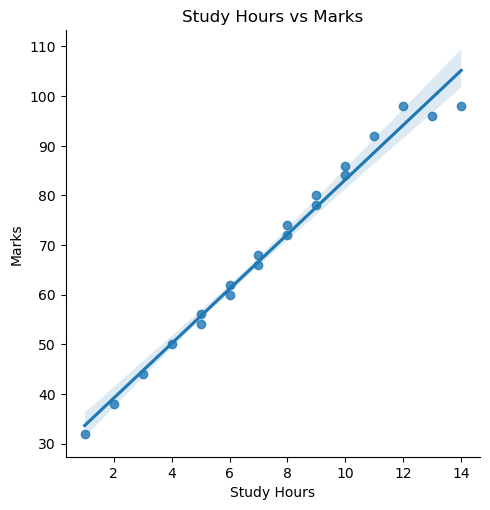

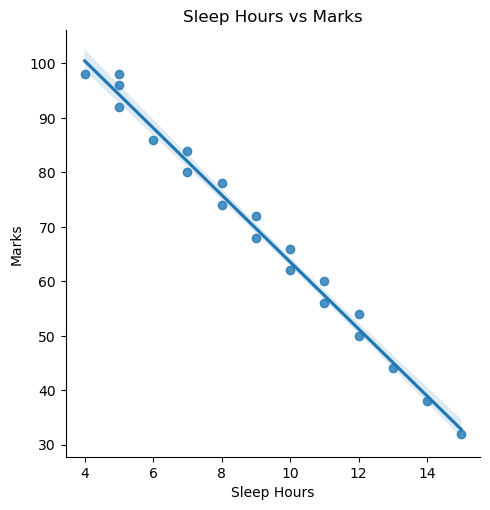

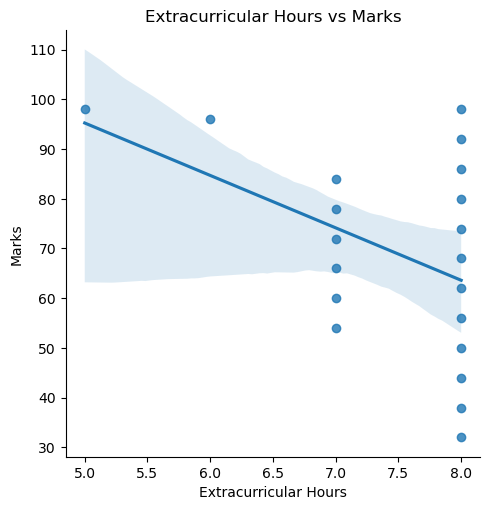

In [3]:
# Scatter plots to visualize relationships
sns.lmplot(x='Study Hours', y='Marks', data=df)
plt.title('Study Hours vs Marks')
plt.show()

sns.lmplot(x='Sleep Hours', y='Marks', data=df)
plt.title('Sleep Hours vs Marks')
plt.show()

sns.lmplot(x='Extracurricular Hours', y='Marks', data=df)
plt.title('Extracurricular Hours vs Marks')
plt.show()

In [4]:
# Define features and target
X = df[['Study Hours', 'Sleep Hours', 'Extracurricular Hours']]
y = df['Marks']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Create the model
model = LinearRegression()

In [6]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Print the R^2 score
print(f'R^2 score on training data: {model.score(X_train, y_train)}')

R^2 score on training data: 0.9982059513259247


In [8]:
# Predict on the test set
y_pred = model.predict(X_test)

In [9]:
# Calculate and print the Mean Squared Error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.6425079548091204
R^2 Score: 0.9975621536284646


In [11]:
# Save the model to a file
with open('Student_Marks.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Load the model from the file
with open('Student_Marks.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [13]:
# Example prediction with the loaded model
example_input = np.array([[8, 7, 3]])  # Example: 8 Study Hours, 7 Sleep Hours, 3 Extracurricular Hours
example_prediction = loaded_model.predict(example_input)
print(f'Predicted Marks for input {example_input}: {example_prediction[0]}')

Predicted Marks for input [[8 7 3]]: 75.47167174796749


# Summary
**Import Libraries:** Import necessary libraries for data manipulation, visualization, and modeling.

**Load Data:** Read the dataset into a Pandas DataFrame.

**Visualize Data:** Create scatter plots to understand the relationships between features and marks.

**Prepare Data:** Define features and target, then split the data into training and testing sets.

**Train Model:** Create and fit a linear regression model using the training data.

**Evaluate Model:** Predict marks on the test set and calculate performance metrics.

**Save and Load Model:** Save the trained model to a file and demonstrate how to load it and make predictions